## 1. Importing necessary Python libraries.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Creating the data frame

In [41]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## 3. Data Cleaning and Preparation

In [42]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [44]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


## 4. Exploring Restaurant Types

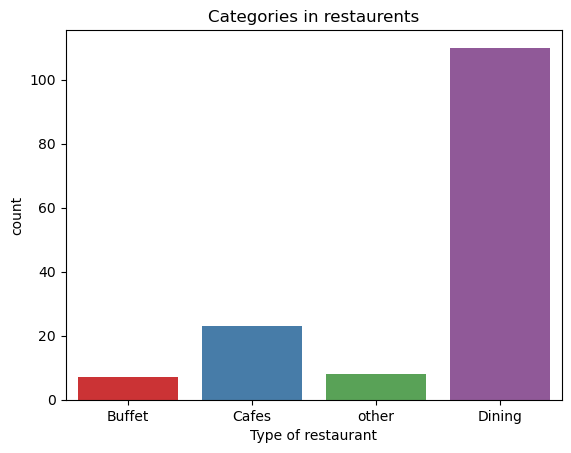

In [45]:
sns.countplot(x=dataframe['listed_in(type)'], palette="Set1")
plt.xlabel("Type of restaurant")
plt.title("Categories in restaurents")
plt.savefig("Categories_in_restaurents.png")
plt.show()

- Conclusion: The majority of the restaurants fall into the dining category.

**Votes by Restaurant Type**

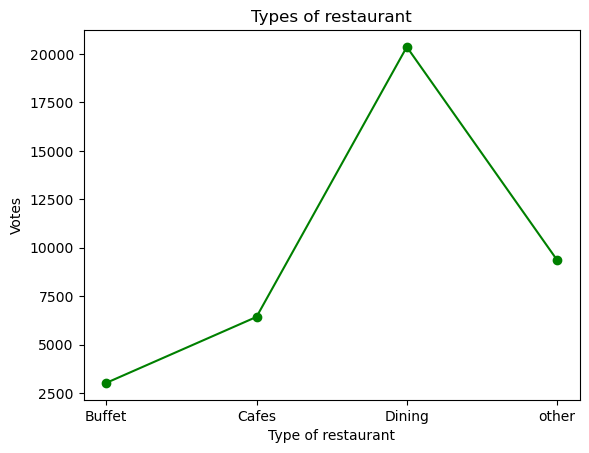

In [47]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.title("Types of restaurant")
plt.savefig("Type_of_restaurant.png")
plt.show()

- Conclusion: Dining restaurants are preferred by a larger number of individuals.

## 5. Identify the Most Voted Restaurant

In [48]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


## 6. Online Order Availability

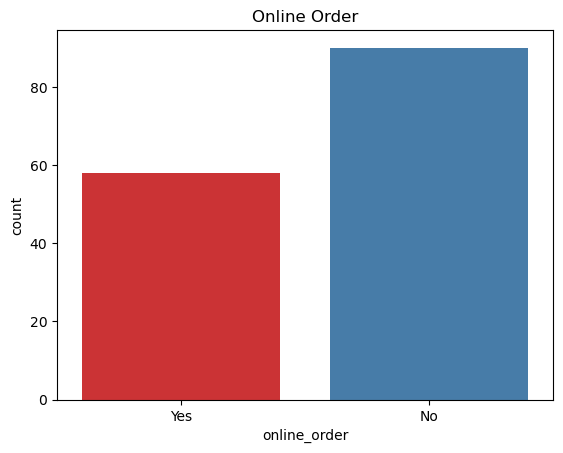

In [49]:
sns.countplot(x=dataframe['online_order'],palette="Set1" )
plt.title("Online Order")
plt.savefig("online_order.png")
plt.show()

- This suggests that a majority of the restaurants do not accept online orders.

## 7. Analyze Ratings

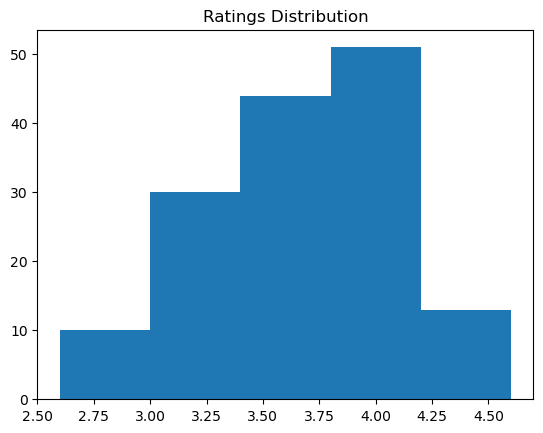

In [50]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.savefig("Ratings_Distribution.png")
plt.show()

- The majority of restaurants received ratings ranging from 3.5 to 4.

## 8. Approximate Cost for Couples

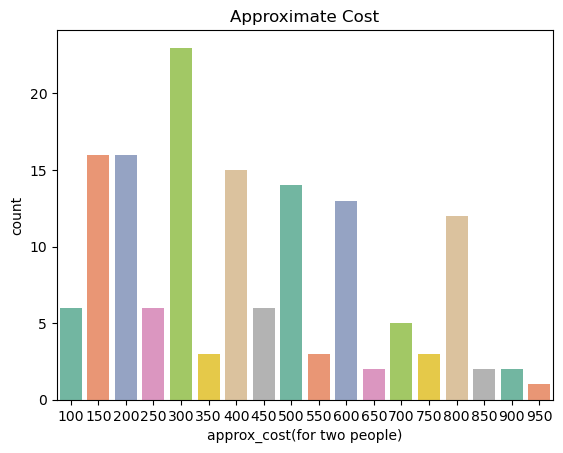

In [51]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette="Set2")
plt.title("Approximate Cost")
plt.savefig("approx_cost.png")
plt.show()

- The majority of couples prefer restaurants with an approximate cost of 300 rupees.

## 9. Ratings Comparison - Online vs Offline Orders

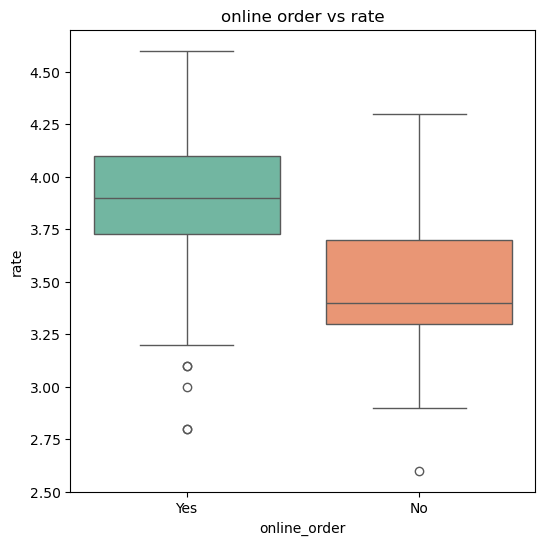

In [52]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe,palette="Set2")
plt.title("online order vs rate")
plt.savefig("online_order_vs_rate_boxplot.png")
plt.show()

- Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

## 10. Order Mode Preferences by Restaurant Type

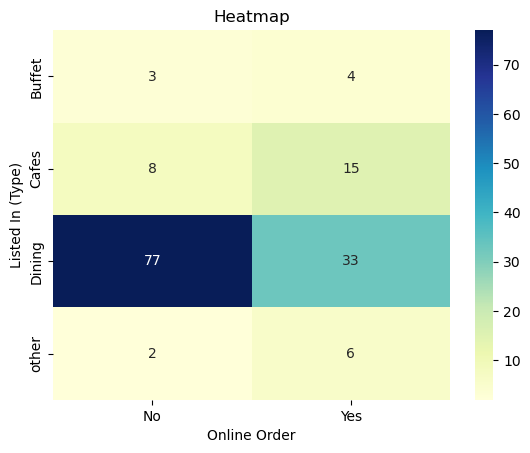

In [55]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.savefig("heatmap.png")
plt.show()

# Overall conclusion:-

- With this we can say that dining restaurants primarily accept offline orders whereas cafes primarily receive online orders.

-  This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.